In [0]:
!pip install python-igraph
!pip install louvain

     |████████████████████████████████| 378kB 4.8MB/s 
  Created wheel for python-igraph: filename=python_igraph-0.7.1.post6-cp36-cp36m-linux_x86_64.whl size=2218378 sha256=224c5de1eb652cec71ec7a1ae8b1636b84174ad3948c635f2e8ebde2dcd7f4e3
  Stored in directory: /root/.cache/pip/wheels/41/d6/02/34eebae97e25f5b87d60f4c0687e00523e3f244fa41bc3f4a7
Successfully built python-igraph
     |████████████████████████████████| 92kB 4.0MB/s 
  Created wheel for louvain: filename=louvain-0.6.1-cp36-cp36m-linux_x86_64.whl size=1026001 sha256=bc14e48d318f10fc3cbfed3e4106d847b758e2725be26dd9596a5b5889843f95
  Stored in directory: /root/.cache/pip/wheels/f2/c3/d4/f7abaf064186d6214ef952bbb72fd6c5136d4b17dbeaeff481
Successfully built louvain


In [0]:
from igraph import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
articles = pd.read_csv('./articles.tsv', sep='\t', skiprows=11, header=None).reset_index()
articles.columns = ['index', 'article']
art_to_id = articles.set_index('article')['index'].to_dict()
id_to_art = articles.set_index('index')['article'].to_dict()
articles.head()

,index,article
0,0,%C3%81ed%C3%A1n_mac_Gabr%C3%A1in
1,1,%C3%85land
2,2,%C3%89douard_Manet
3,3,%C3%89ire
4,4,%C3%93engus_I_of_the_Picts


In [0]:
df = pd.read_csv('./links.tsv', sep='\t', skiprows=11, header=None)
df['source'] = df[0].map(lambda x: art_to_id[x])
df['target'] = df[1].map(lambda x: art_to_id[x])
df.head(15)
# df.where(df[0] == df[1]).dropna()

,0,1,source,target
0,%C3%81ed%C3%A1n_mac_Gabr%C3%A1in,Bede,0,530
1,%C3%81ed%C3%A1n_mac_Gabr%C3%A1in,Columba,0,974
2,%C3%81ed%C3%A1n_mac_Gabr%C3%A1in,D%C3%A1l_Riata,0,1115
3,%C3%81ed%C3%A1n_mac_Gabr%C3%A1in,Great_Britain,0,1772
4,%C3%81ed%C3%A1n_mac_Gabr%C3%A1in,Ireland,0,2149
5,%C3%81ed%C3%A1n_mac_Gabr%C3%A1in,Isle_of_Man,0,2173
6,%C3%81ed%C3%A1n_mac_Gabr%C3%A1in,Monarchy,0,2815
7,%C3%81ed%C3%A1n_mac_Gabr%C3%A1in,Orkney,0,3098
8,%C3%81ed%C3%A1n_mac_Gabr%C3%A1in,Picts,0,3248
9,%C3%81ed%C3%A1n_mac_Gabr%C3%A1in,Scotland,0,3654


In [0]:
tuples = [tuple(x) for x in df[[0, 1]].values]
# tuples = [tuple(x) for x in df[['source', 'target']].values]
my_graph = Graph.TupleList(tuples, directed = True)
# my_graph.simplify()

er_graph = Graph.Erdos_Renyi(my_graph.vcount(), m=my_graph.ecount(), directed = True)
print(my_graph.has_multiple()) # graph does not have multi edges
print(np.alltrue(~np.array(my_graph.is_loop()))) # but it has loops
print(my_graph.is_connected()) # and is disconnected

False
False
False


In [0]:
isolated_nodes = set.difference(set(articles['article']), set(my_graph.vs['name']))
len(isolated_nodes)
my_graph.add_vertices(isolated_nodes)
my_graph.vcount()
# wiki_graph.add_nodes_from(isolated_nodes)
# len(wiki_graph.nodes())

4604

## Basic characteristics

In [0]:
print("Graphs node count: ", my_graph.vcount(), ", edge count: ", my_graph.ecount())

Graphs node count:  4592 , edge count:  119882


In [0]:
#Avg degree

print("My graph average degree: ", np.mean(my_graph.degree()))
print("Erdos-Renyi average degree: ", np.mean(er_graph.degree()))

My graph average degree:  52.21341463414634
Erdos-Renyi average degree:  52.21341463414634


In [0]:
#Avg indegree and outdegree

print("My graph average indegree: ", np.mean(my_graph.indegree()))
print("Erdos-Renyi average indegree: ", np.mean(er_graph.indegree()))

print("My graph average outdegree: ", np.mean(my_graph.outdegree()))
print("Erdos-Renyi average outdegree: ", np.mean(er_graph.outdegree()))

My graph average indegree:  26.10670731707317
Erdos-Renyi average indegree:  26.10670731707317
My graph average outdegree:  26.10670731707317
Erdos-Renyi average outdegree:  26.10670731707317


In [0]:
#Min degree

print("My graph min degree: ", np.min(my_graph.degree()))
print("Erdos-Renyi min degree: ", np.min(er_graph.degree()))

My graph min degree:  1
Erdos-Renyi min degree:  29


In [0]:
#Min indegree and outdegree

print("My graph min indegree: ", np.min(my_graph.indegree()))
print("Erdos-Renyi min indegree: ", np.min(er_graph.indegree()))

print("My graph min outdegree: ", np.min(my_graph.outdegree()))
print("Erdos-Renyi min outdegree: ", np.min(er_graph.outdegree()))

My graph min indegree:  0
Erdos-Renyi min indegree:  7
My graph min outdegree:  0
Erdos-Renyi min outdegree:  10


In [0]:
#Max degree

print("My graph max degree: ", np.max(my_graph.degree()))
print("Erdos-Renyi max degree: ", np.max(er_graph.degree()))

My graph max degree:  1845
Erdos-Renyi max degree:  80


In [0]:
#Max indegree and outdegree

print("My graph max indegree: ", np.max(my_graph.indegree()))
print("Erdos-Renyi max indegree: ", np.max(er_graph.indegree()))

print("My graph max outdegree: ", np.max(my_graph.outdegree()))
print("Erdos-Renyi max outdegree: ", np.max(er_graph.outdegree()))

My graph max indegree:  1551
Erdos-Renyi max indegree:  46
My graph max outdegree:  294
Erdos-Renyi max outdegree:  47


In [0]:
# np.mean(my_graph.knn())
my_graph.knn()
# print("My graph average nearest neighbor degree: ", np.mean(my_graph.knn()))
# print("Erdos-Renyi nearest neighbor degree: ", np.mean(er_graph.knn()))

InternalError: ignored

In [0]:
np.sum(my_graph.degree(my_graph.neighbors(1))) / len(my_graph.neighbors(1))

115.64102564102564

In [0]:
print("My graph degree assortativity coefficient: ", my_graph.assortativity_degree())
print("Erdos-Renyi degree assortativity coefficient: ", er_graph.assortativity_degree())

My graph degree assortativity coefficient:  -0.05620919781872144
Erdos-Renyi degree assortativity coefficient:  0.0010859129169577513


In [0]:
paths_lengths = my_graph.shortest_paths()

In [0]:
my_graph.average_path_length()

3.202522563331053

In [0]:
my_graph.average_path_length()

545.981416925404

In [0]:
paths_lengths = np.array(paths_lengths)
paths_lengths[paths_lengths==np.inf] = 0

avg_shortest_path_len = np.sum(paths_lengths[paths_lengths > 0]) / len(paths_lengths[paths_lengths > 0])

print("My graph average shortest path length: ", avg_shortest_path_len)

My graph average shortest path length:  3.202522563331053


In [0]:
er_paths_lengths = er_graph.shortest_paths()

In [0]:
er_paths_lengths = np.array(er_paths_lengths, dtype=np.float32)
er_paths_lengths[er_paths_lengths==np.inf] = 0

er_avg_shortest_path_len = np.sum(er_paths_lengths[er_paths_lengths > 0]) / len(er_paths_lengths[er_paths_lengths > 0])
print("Erdos-Renyi average shortest path length: ", er_avg_shortest_path_len)

Erdos-Renyi average shortest path length:  2.8812052364230274


In [0]:
my_diameter = my_graph.get_diameter()
my_graph.vs[my_diameter]['name']

['Scheme_programming_language',
 'Functional_programming',
 'Calculus',
 '10th_century',
 'Sweden',
 'Tennis',
 'Boris_Becker',
 'Hopman_Cup',
 'Argyle_diamond_mine',
 'Rio_Tinto_Group']

In [0]:
er_graph.get_diameter()

[0, 573, 146, 518, 4151]

In [0]:
print("My graph diameter: ", np.max(paths_lengths))
print("Erdos-Renyi diameter: ", np.max(er_paths_lengths))

My graph diameter:  9.0
Erdos-Renyi diameter:  4.0


In [0]:
my_gcc = my_graph.clusters(mode='strong').giant()
er_gcc = er_graph.clusters(mode='strong').giant()

print("My graph GCC size: ", my_gcc.vcount(), ", percent of whole graph: ", np.rint(my_gcc.vcount() / my_graph.vcount() * 100), "%")
print("Erdos-Renyi GCC size: ", er_gcc.vcount(), ", percent of whole graph: ", np.rint(er_gcc.vcount() / er_graph.vcount() * 100), "%")

My graph GCC size:  4051 , percent of whole graph:  88.0 %
Erdos-Renyi GCC size:  4592 , percent of whole graph:  100.0 %


In [0]:
print("My graph cluster count: ", len(my_graph.clusters().subgraphs()))
print("Erdo-Renyi cluster count: ", len(er_graph.clusters().subgraphs()))

for g in my_graph.clusters().subgraphs():
  print(g.vcount())

My graph cluster count:  519
Erdo-Renyi cluster count:  1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
6
1
2
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
2
1
1
1
1
2
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
3
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


Almost all other clusters are in fact isolated vertices.

In [0]:
# Local clustering coefficient for directed graph
my_trans = np.array(my_graph.transitivity_local_undirected(mode='nan')) / 2
my_cluster_coef = np.mean(my_trans[np.logical_not(np.isnan(my_trans))]) 

er_trans = np.array(er_graph.transitivity_local_undirected(mode='nan')) / 2
er_cluster_coef = np.mean(er_trans[np.logical_not(np.isnan(er_trans))])

# library implementations which differ
#my_graph.transitivity_avglocal_undirected(mode='nan') / 2
#er_graph.transitivity_avglocal_undirected(mode='nan') / 2

print("My graph average local clustering coefficient: ", my_cluster_coef)
print("Erdos-Renyi average local clustering coefficient: ", er_cluster_coef)

My graph average local clustering coefficient:  0.11134492596939381
Erdos-Renyi average local clustering coefficient:  0.005663794023591778


In [0]:
print("My graph global clustering coeficient: ", my_graph.transitivity_undirected())
print("Erdos-Renyi global clustering coeficient: ",  er_graph.transitivity_undirected())

My graph global clustering coeficient:  0.10294055595572603
Erdos-Renyi global clustering coeficient:  0.011393241712079052


In [0]:
print("My graph average betweenness centrality: ", np.mean(my_graph.betweenness()))
print("Erdos-Renyi average betweenness centrality: ", np.mean(er_graph.betweenness()))

My graph average betweenness centrality:  8915.724520905922
Erdos-Renyi average betweenness centrality:  8636.630444250874



## Distributions

In [0]:
def log_binning(x, dist):
  bins = np.logspace(np.log10(min(x)), np.log10(max(x)), num=60)
  avg_vals = np.zeros_like(bins)

  for i in range(1, len(bins)):
#     print(bins[i-1], "   ", bins[i])
    avg_vals[i-1] = np.mean(dist.to_numpy()[int(np.ceil(bins[i-1])):int(np.ceil(bins[i]))])
#     print(avg_vals[i-1])

  avg_vals[len(bins) - 1] = np.mean(dist.to_numpy()[int(np.ceil(bins[len(bins) - 2])):int(np.ceil(bins[len(bins) - 1]))])
    
  idx = np.argwhere(np.isnan(avg_vals))
  return np.delete(bins, idx), np.delete(avg_vals, idx)

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:1085: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_xlim(left, right)
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:1085: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_xlim(left, right)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  if sys.path[0] == '':


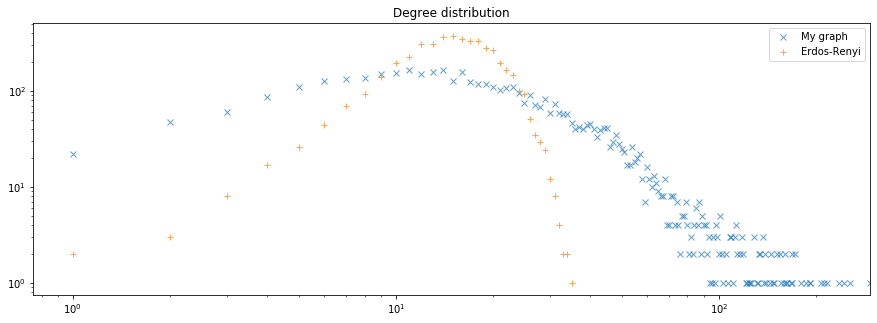

In [0]:
my_hist = my_graph.degree_distribution(mode='OUT')
er_hist = er_graph.degree_distribution(mode='OUT')

my_p_k = pd.Series([number for (left, right, number) in my_hist.bins()])
er_p_k = pd.Series([number for (left, right, number) in er_hist.bins()])

my_p_k.plot(loglog=True, legend=True, label='My graph', style='x', figsize=(15,5), title='Degree distribution', alpha=0.7)
er_p_k.plot(loglog=True, legend=True, label='Erdos-Renyi', style='+', alpha=0.7)

# bins, vals = log_binning(my_graph.degree(), my_p_k)
# print(vals)
plt.ylim(my_p_k.min() - 1)
# plt.xscale('log')
# plt.yscale('log')
# plt.scatter(y=vals, x = bins, c = 'red', alpha=0.7, label='Binned data')
plt.legend()

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:1085: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_xlim(left, right)


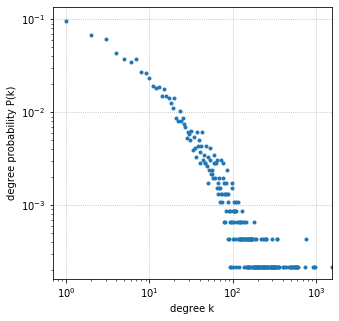

In [0]:
my_hist = my_graph.degree_distribution(mode='in')

my_p_k = pd.Series([number for (left, right, number) in my_hist.bins()])

# plt.grid(linestyle='dotted')
# my_p_k.plot(loglog=True, style='.', figsize=(5,5), alpha=1, grid=True)

# bins, vals = log_binning(my_graph.degree(), my_p_k)
# print(vals)
# plt.ylim(my_p_k.min() - 1)
# plt.xscale('log')
# plt.yscale('log')
# plt.scatter(y=vals, x = bins, c = 'red', alpha=0.7, label='Binned data')
# plt.legend()


plt.grid(linestyle='dotted')
plt.xlabel('degree k')
plt.ylabel('degree probability P(k)')
(my_p_k / sum(my_p_k)).plot(loglog=True, style='.', figsize=(5,5), alpha=1, grid=True)
plt.savefig('indegree.eps', format='eps', bbox_inches='tight', dpi=96)

In [0]:
sum(my_p_k)

4604

In [0]:
my_hist = my_graph.degree_distribution(mode='in')
my_p_k = pd.Series([number for (left, right, number) in my_hist.bins()])

my_hist_out = my_graph.degree_distribution(mode='out')
my_p_k_out = pd.Series([number for (left, right, number) in my_hist_out.bins()])


# plt.grid(linestyle='dotted')
# plt.xlabel('degree k')
# my_p_k_out.plot(loglog=True, style='.', figsize=(5,5), alpha=1, grid=True)
# plt.savefig('outdegree.eps',  format='eps', bbox_inches='tight', dpi=96)

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:1085: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_xlim(left, right)
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:1085: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_xlim(left, right)


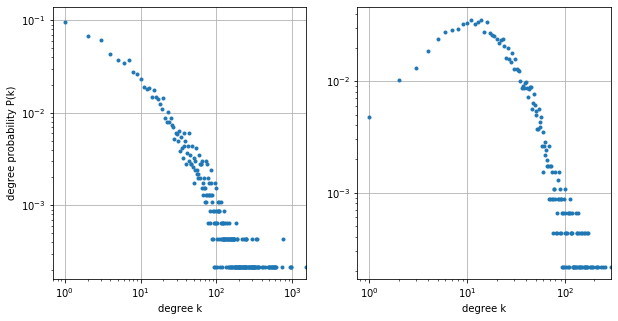

In [0]:
plt.subplot(1,2,1)
plt.xlabel('degree k')
plt.ylabel('degree probability P(k)')
(my_p_k / sum(my_p_k)).plot(loglog=True, style='.', figsize=(10,5), alpha=1,grid=True)

plt.subplot(1,2,2)
plt.xlabel('degree k')
(my_p_k_out / sum(my_p_k_out)).plot(loglog=True, style='.', figsize=(10,5), alpha=1, grid=True)
plt.savefig('distrs.eps',  format='eps', bbox_inches='tight')

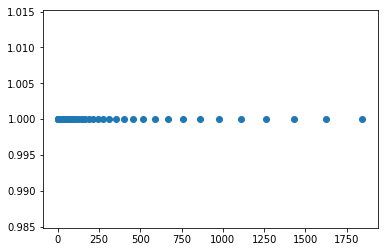

In [0]:
plt.scatter(x=bins, y = np.ones_like(bins))

In [0]:
result = power_law_fit(my_p_k)
result.summary()

'Fitted power-law distribution on discrete data\n\nExponent (alpha)  = 1.813082\nCutoff (xmin)     = 11.000000\n\nLog-likelihood    = -301.656429\n\nH0: data was drawn from the fitted distribution\n\nKS test statistic = 0.072909\np-value           = 0.891171\n\nH0 could not be rejected at significance level 0.05'

In [0]:
result_out = power_law_fit(my_p_k_out)
result_out.summary()

'Fitted power-law distribution on discrete data\n\nExponent (alpha)  = 1.388564\nCutoff (xmin)     = 1.000000\n\nLog-likelihood    = -622.515122\n\nH0: data was drawn from the fitted distribution\n\nKS test statistic = 0.105297\np-value           = 0.064311\n\nH0 could not be rejected at significance level 0.05'

In [0]:
!pip install powerlaw

  Created wheel for powerlaw: filename=powerlaw-1.4.6-cp36-none-any.whl size=24786 sha256=307ca517a3ba5b8008a4569bd341972332320c295440a54512516e95898275b1
  Stored in directory: /root/.cache/pip/wheels/e0/27/02/08d0e2865072bfd8d7c655e290521e3feca3fc22f1ac460601
Successfully built powerlaw


Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
/usr/local/lib/python3.6/dist-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


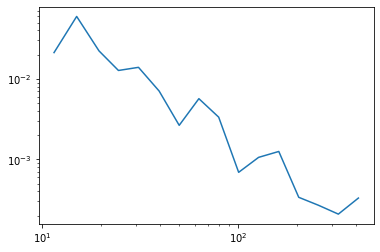

In [0]:
import powerlaw

fitted = powerlaw.Fit(my_p_k)

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:856: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


ValueError: ignored

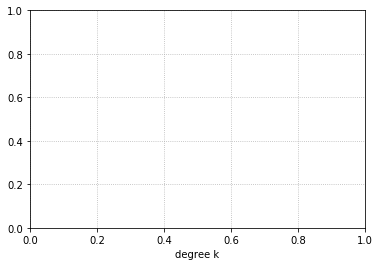

In [0]:
#IN
plt.grid(linestyle='dotted')
plt.xlabel('degree k')
# x = np.arange(10**3)
y = my_p_k ** (-fitted.alpha) * np.sum(my_p_k[int(fitted.xmin):])
plt.plot(x,y)
my_p_k.plot(loglog=True, style='.', figsize=(5,5), alpha=1, grid=True)
# plt.savefig('outdegree.eps',  format='eps', bbox_inches='tight', dpi=96)

In [0]:
result2 = power_law_fit(my_P_k)
result2.summary()

NameError: ignored

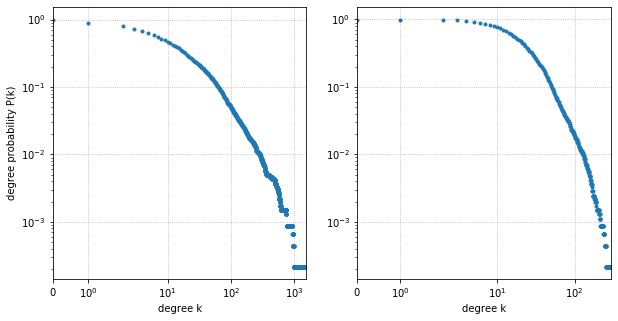

In [0]:
# my_P_k = my_p_k[::-1].cumsum()[::-1]
# er_P_k = er_p_k[::-1].cumsum()[::-1]

plt.subplot(1,2,1)
plt.grid(linestyle='dotted')
plt.xscale('symlog')
plt.yscale('log')
plt.xlabel('degree k')
plt.ylabel('degree probability P(k)')
plt.xlim(left=-10)
# plt.scatter(my_p_k[::-1].cumsum() / np.sum(my_p_k), marker='.', figsize=(5,5))
(my_p_k[::-1].cumsum() / np.sum(my_p_k)).plot(
    # loglog=True, 
            # legend=True, 
            # label='My graph', 
            style='.', 
            figsize=(10,5), 
            # title='Cumulative indegree distribution',
            grid=True)

plt.subplot(1,2,2)
plt.grid(linestyle='dotted')
plt.xscale('symlog')
plt.yscale('log')
plt.xlabel('degree k')
plt.xlim(left=-10)
# plt.ylabel('degree probability P(k)')
# plt.plot(my_p_k[::-1].cumsum() / np.sum(my_p_k), marker='.')
(1.0 - my_p_k_out.cumsum() / sum(my_p_k_out)).plot(
            # loglog=True, 
            # legend=True, 
            # label='My graph', 
            style='.', 
            figsize=(10,5), 
            # title='Cumulative outdegree distribution',
            grid=True)
plt.savefig('cum_distrs.eps',  format='eps', bbox_inches='tight')

In [0]:
sum(my_p_k_out)

4604

In [0]:
my_p_k[::-1].cumsum() / my_p_k.sum()

1551    0.000217
1550    0.000217
1549    0.000217
1548    0.000217
1547    0.000217
          ...   
4       0.674196
3       0.735230
2       0.802129
1       0.898132
0       1.000000
Length: 1552, dtype: float64

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:856: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:1085: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_xlim(left, right)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


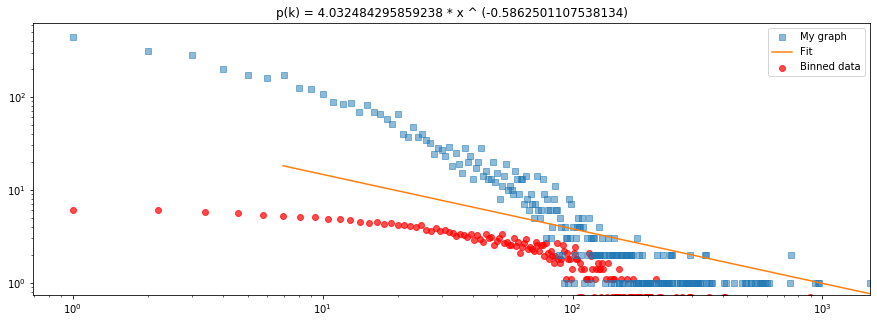

In [0]:

from scipy.optimize import curve_fit

def f(x, a, k):
  return a - np.log(x) * k

offset = 5
x = np.linspace(min(my_graph.degree()), max(my_graph.degree()), num = len(my_p_k))


y = np.log(my_p_k)
y[y==-np.inf] = 0
y2 = np.log(my_p_k)
y2[y2==-np.inf] = 0
# popt, pcov = curve_fit(f, bins[offset:], y[offset:])
popt, pcov = curve_fit(f, x[offset:], y2[offset:])

# pred_y = pd.Series(f(bins[offset:], popt[0], popt[1]))
pred_y2 = pd.Series(f(x[offset:], popt[0], popt[1]))
my_p_k.plot(loglog=True, legend=True, style='s', figsize=(15,5), alpha=0.5, label='My graph')


C = (result.alpha-1) * result.xmin**(result.alpha-1)
plt.ylim(my_p_k.min()-1)
# plt.plot(bins[offset:], np.exp(pred_y), label = 'Fit')
plt.plot(x[offset:], np.exp(pred_y2), label = 'Fit')
# plt.plot(x, (pd.Series(result.D * x **(-result.alpha))), label = 'Fit2')
plt.scatter(y=y, x = x, c = 'red', alpha=0.7, label='Binned data')
plt.title("p(k) = {} * x ^ (-{})".format(popt[0], popt[1]))
plt.legend()

In [0]:
popt, pcov = curve_fit(f, x, np.log(my_P_k.values))
pred_P_y = pd.Series(f(x, popt[0], popt[1]))

my_P_k.plot(loglog=True, legend=True, label='My graph', style='s', figsize=(15,5), title='Distribution function', alpha=0.5)
plt.plot(x, np.exp(pred_P_y), label = 'Fit')
plt.title("P(k) = {} * x ^ (-{})".format(popt[0], popt[1]))
plt.legend()

In [0]:
my_paths_counts = pd.Series(paths_lengths[paths_lengths>0]).value_counts()
er_paths_counts = pd.Series(er_paths_lengths[er_paths_lengths>0]).value_counts()

my_paths_counts.plot(style='.', title='Shortest paths length distribution', 
                     label='My graph', legend=True, figsize=(15, 5), ms=20, alpha=0.8)
er_paths_counts.plot(style='.', label='Erdos-Renyi', legend=True, ms=20, alpha=0.5)
plt.legend()

In [0]:
my_trans_counts = pd.Series(my_graph.transitivity_local_undirected()).value_counts()
er_trans_counts = pd.Series(er_graph.transitivity_local_undirected()).value_counts()

my_trans_counts.plot(style='.', title='Clustering coefficients distribution', 
                     label='My graph', legend=True, figsize=(15, 5))
er_trans_counts.plot(style='.', label='Erdos-Renyi', legend=True)



# my_trans_df = my_trans_counts.to_frame().reset_index()
# my_trans_df.columns = ['coef', 'count']

# er_trans_df = er_trans_counts.to_frame().reset_index()
# er_trans_df.columns = ['coef', 'count']

# import seaborn as sns
# sns.regplot(x='coef', y='count', data=my_trans_df, scatter_kws={"figsize": "(15, 5)"}) 
# sns.regplot(x='coef', y='count', data=er_trans_df)

### Correlations

In [0]:
import altair as alt
alt.data_transformers.enable('default', max_rows=None) 

In [0]:
degree = my_graph.degree()
cluster_coef = np.array(my_graph.transitivity_local_undirected(mode='nan')) / 2
betweenness = my_graph.betweenness()


viz_df = pd.DataFrame(zip(degree, cluster_coef, betweenness), columns=['degree', 'cluster_coef', 'betweenness'], )

er_degree = er_graph.degree()
er_cluster_coef = np.array(er_graph.transitivity_local_undirected(mode='nan')) / 2
er_betweenness = er_graph.betweenness()


er_viz_df = pd.DataFrame(zip(er_degree, er_cluster_coef, er_betweenness), columns=['degree', 'cluster_coef', 'betweenness'], )

In [0]:
viz_df.sort_values(by=['degree'])

In [0]:
alt.Chart(viz_df).mark_circle().encode(x = alt.X('degree', title='Degree'),  
                                   y = alt.Y('cluster_coef', title='Local clustering coefficient', 
                                             ))

High degree nodes typically have lower cluster coefficients. This means that their neighbors have low probability of being connected. This can be explained in a way that there are some very abstract concepts so that many other concepts that are quite different can refer to them.

In [0]:
print("Erdos-Renyi")
alt.Chart(er_viz_df).mark_circle().encode(x = alt.X('degree', title='Degree'),  
                                   y = alt.Y('cluster_coef', title='Local clustering coefficient', 
                                             ))

Looking on transitivity of degree 2 nodes can be uninformative, since it will always be equal to 0.5 or 0.


In [0]:
paths_lengths[paths_lengths==0] = np.nan
avg_paths = np.nanmean(paths_lengths, axis=1)
viz_df['avg_paths'] = avg_paths

er_paths_lengths[er_paths_lengths==0] = np.nan
er_avg_paths = np.nanmean(er_paths_lengths, axis=1)
er_viz_df['er_avg_paths'] = er_avg_paths

In [0]:
alt.Chart(viz_df).mark_circle().encode(x = alt.X('degree', title='Degree'),  
                                   y = alt.Y('avg_paths', title='Average shortest path', 
                                             ))

Nodes with high degree typicaly have rather short shortest path

In [0]:
print("Erdos-Renyi")
alt.Chart(er_viz_df).mark_circle().encode(x = alt.X('degree', title='Degree'),  
                                   y = alt.Y('er_avg_paths', title='Average shortest path', 
                                             ))

In [0]:
alt.Chart(viz_df).mark_circle().encode(x = alt.X('degree', title='Degree'),  
                                   y = alt.Y('betweenness', title='Betweenness centrality', 
                                             ))

In [0]:
print("Erdos-Renyi")
alt.Chart(er_viz_df).mark_circle().encode(x = alt.X('degree', title='Degree'),  
                                   y = alt.Y('betweenness', title='Betweenness centrality', 
                                             ))

In [0]:
print("My graph assortativity by clustering coefficients: ",
      my_graph.assortativity(my_graph.transitivity_local_undirected(mode='zero')))
print("Erdos-Renyi assortativity by clustering coefficients: ",
      my_graph.assortativity(er_graph.transitivity_local_undirected(mode='zero')))

### Community structure

In [0]:
import louvain

my_partition = louvain.find_partition(my_graph, louvain.ModularityVertexPartition)
print("My graph modularity score of partitioning by Louvain algorithm: ", my_partition.modularity)

In [0]:
print("Number of communities of my graph: ", max(my_partition.membership) + 1)

In [0]:
cluster_sizes = pd.Series(my_partition.sizes())
cluster_sizes.plot(style='*', title='Community sizes', xlim=(-1, max(my_partition.membership)+1))

In [0]:
def print_community(partition, n):
  idx = np.argwhere(np.array(partition.membership) == n)
  for i in idx:
    print(partition.graph.vs[i[0]]['name'])
    
print_community(my_partition, 8)

In [0]:
## Tennis
print_community(my_partition, 7)

In [0]:
## Asia - culture, geography, people
print_community(my_partition, 6)

In [0]:
## England 
print_community(my_partition, 5)

In [0]:
## Geography - countries, cities
print_community(my_partition, 4)

In [0]:
## Nature, science 
print_community(my_partition, 3)

In [0]:
## America, little bit of England
print_community(my_partition, 2)

In [0]:
## Biology - animals, plants 
print_community(my_partition, 1)

In [0]:
## Centuries, philosophy, famous people, history, political science
print_community(my_partition, 0)

### Visualization

In [0]:
import networkx as nx

nx_graph = nx.from_pandas_edgelist(df)
nx.draw(nx_graph)

### Paths graph analysis

In [0]:
paths_df = pd.read_csv('./paths_finished.tsv', sep='\t', skiprows=16, header=None).reset_index()
paths_df.columns = ['index', 'hashedIP', 'tstamp', 'durationSec', 'path', 'rating']
paths_df.head()

In [0]:
#MAX: 22 <
def get_edge_seq(path):
  parts = path.split(";")
  
  edges = np.zeros(len(parts)-1, dtype=object)
  last = []
  last_val = str()
  cpy = np.zeros(len(parts), dtype=object)
  cpy[0] = parts[0]
  for i in range(1, len(parts)):
    if parts[i] != "<":
      cpy[i] = parts[i]
      
      idx = i - 1
      if parts[idx] == "<":
        last.append(last_val)
      else:
        last.append(parts[i - 1])
    else:
      cpy[i] = last.pop()
      last_val = cpy[i]
  
  for i in range(len(parts)-1):
    edges[i] = (cpy[i], cpy[i+1])
      
  return edges.tolist()

In [0]:
tuples = [get_edge_seq(val) for val in paths_df['path'].values]

In [0]:
cont = []
for i in range(len(tuples)):
  cont += tuples[i]

paths_graph = Graph.TupleList(cont, directed = True)
er_paths_graph = Graph.Erdos_Renyi(n=paths_graph.vcount(), m=paths_graph.ecount(), directed = True)

In [0]:
print(paths_graph.has_multiple()) # graph has multi edges
print(np.alltrue(~np.array(paths_graph.is_loop()))) # but it does not have loops
print(paths_graph.is_connected()) # and is disconnected

True
True
False


In [0]:
print("Paths graph node count: ", paths_graph.vcount(), ", edge count: ", paths_graph.ecount())

Paths graph node count:  4169 , edge count:  295460


In [0]:
#Avg degree

print("Paths graph average degree: ", np.mean(paths_graph.degree()))
print("Erdos-Renyi paths graph average degree: ", np.mean(er_paths_graph.degree()))

In [0]:
#Avg indegree and outdegree

print("Paths graph average indegree: ", np.mean(paths_graph.indegree()))
print("Paths graph average outdegree: ", np.mean(paths_graph.outdegree()))

print("Erdo-Renyi paths graph average indegree: ", np.mean(er_paths_graph.indegree()))
print("Erdo-Renyi paths graph average outdegree: ", np.mean(er_paths_graph.outdegree()))

In [0]:
#Min degree

print("Paths graph min degree: ", np.min(paths_graph.degree()))
print("Erdo-Renyi paths graph min degree: ", np.min(er_paths_graph.degree()))

In [0]:
#Min indegree and outdegree

print("Paths graph min indegree: ", np.min(paths_graph.indegree()))
print("Paths graph min outdegree: ", np.min(paths_graph.outdegree()))

print("Erdo-Renyi paths graph min indegree: ", np.min(er_paths_graph.indegree()))
print("Erdo-Renyi paths graph min outdegree: ", np.min(er_paths_graph.outdegree()))

In [0]:
#Max degree

print("Paths graph max degree: ", np.max(paths_graph.degree()))
print("Erdo-Renyi paths graph max degree: ", np.max(er_paths_graph.degree()))

In [0]:
#Max indegree and outdegree

print("Paths graph max indegree: ", np.max(paths_graph.indegree()))
print("Paths graph max outdegree: ", np.max(paths_graph.outdegree()))

print("Erdo-Renyi paths graph max indegree: ", np.max(er_paths_graph.indegree()))
print("Erdo-Renyi paths graph max outdegree: ", np.max(er_paths_graph.outdegree()))

In [0]:
print("Paths graph degree assortativity coefficient: ", paths_graph.assortativity_degree())
print("Erdo-Renyi paths graph degree assortativity coefficient: ", er_paths_graph.assortativity_degree())

In [0]:
pg_paths_lengths = paths_graph.shortest_paths()

In [0]:
er_pg_paths_lengths = er_paths_graph.shortest_paths()

In [0]:
pg_paths_lengths = np.array(pg_paths_lengths)
pg_paths_lengths[pg_paths_lengths==np.inf] = 0

pg_avg_shortest_path_len = np.sum(pg_paths_lengths[pg_paths_lengths > 0]) / len(pg_paths_lengths[pg_paths_lengths > 0])

print("Paths graph average shortest path length: ", pg_avg_shortest_path_len)

In [0]:
er_pg_paths_lengths = np.array(er_pg_paths_lengths)
er_pg_paths_lengths[er_pg_paths_lengths==np.inf] = 0

er_pg_avg_shortest_path_len = np.sum(er_pg_paths_lengths[er_pg_paths_lengths > 0]) / len(er_pg_paths_lengths[er_pg_paths_lengths > 0])

print("Erdo-Renyi paths graph average shortest path length: ", er_pg_avg_shortest_path_len)

In [0]:
print("Paths graph diameter: ", np.max(pg_paths_lengths))
print("Erdo-Renyi paths graph diameter: ", np.max(er_pg_paths_lengths))

In [0]:
paths_diameter = paths_graph.get_diameter()
paths_graph.vs[paths_diameter]['name']

['Pali_Canon',
 'Sri_Lanka',
 'British_Empire',
 'United_States',
 'Scooby-Doo',
 'Buffy_the_Vampire_Slayer',
 'Firefly_%28TV_series%29',
 'Serenity_%28film%29',
 'Starship_Troopers']

In [0]:
pg_gcc = paths_graph.clusters(mode='strong').giant()
er_pg_gcc = er_paths_graph.clusters(mode='strong').giant()
print("Paths graph GCC size: ", pg_gcc.vcount(), ", percent of whole graph: ", np.rint(pg_gcc.vcount() / paths_graph.vcount() * 100), "%")
print("Erdo-Renyi paths graph GCC size: ", er_pg_gcc.vcount(), ", percent of whole graph: ", np.rint(er_pg_gcc.vcount() / er_paths_graph.vcount() * 100), "%")

In [0]:
print("Paths graph cluster count: ", len(paths_graph.clusters().subgraphs()))
print("ER paths graph cluster count: ", len(er_paths_graph.clusters().subgraphs()))

for g in paths_graph.clusters().subgraphs():
  print(g.vcount())

Paths graph cluster count:  353
ER paths graph cluster count:  1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
3817
1
1
1
1
1
1


In [0]:
# Local clustering coefficient for directed graph
pg_trans = np.array(paths_graph.transitivity_local_undirected(mode='nan')) / 2
pg_cluster_coef = np.mean(pg_trans[np.logical_not(np.isnan(pg_trans))]) 

er_pg_trans = np.array(er_paths_graph.transitivity_local_undirected(mode='nan')) / 2
er_pg_cluster_coef = np.mean(er_pg_trans[np.logical_not(np.isnan(er_pg_trans))]) 


print("Paths graph average local clustering coefficient: ", pg_cluster_coef)
print("Erdo-Renyi paths graph average local clustering coefficient: ", er_pg_cluster_coef)

In [0]:
print("Paths graph global clustering coeficient: ", paths_graph.transitivity_undirected())
print("Erdo-Renyi paths graph global clustering coeficient: ", er_paths_graph.transitivity_undirected())

In [0]:
print("Paths graph average betweenness centrality: ", np.mean(paths_graph.betweenness()))
print("Erdo-Renyi paths graph average betweenness centrality: ", np.mean(er_paths_graph.betweenness()))

In [0]:
paths_hist = paths_graph.degree_distribution()
er_paths_hist = er_paths_graph.degree_distribution()

paths_p_k = pd.Series([number for (left, right, number) in paths_hist.bins()])
er_paths_p_k = pd.Series([number for (left, right, number) in er_paths_hist.bins()])

paths_p_k.plot(loglog=True, legend=True, label='My graph', style='x', figsize=(15,5), title='Degree distribution', alpha=0.7)
er_paths_p_k.plot(loglog=True, legend=True, label='Erdos-Renyi', style='+', alpha=0.7)

bins, vals = log_binning(paths_graph.degree(), paths_p_k)
plt.ylim(paths_p_k.min()-1)
plt.scatter(y=vals, x = bins, c = 'red', alpha=0.7)
plt.legend()

In [0]:
paths_P_k = paths_p_k[::-1].cumsum()[::-1]
er_paths_P_k = er_paths_p_k[::-1].cumsum()[::-1]

paths_P_k.plot(loglog=True, legend=True, label='My graph', style='x', figsize=(15,5), 
            title='Cumulative degree distribution')
er_paths_P_k.plot(loglog=True, legend=True, label='Erdos-Renyi', style='+')
plt.legend()

In [0]:
popt, pcov = curve_fit(f, x, np.log(my_P_k.values))
pred_P_y = pd.Series(f(x, popt[0], popt[1]))

my_P_k.plot(loglog=True, legend=True, label='My graph', style='s', figsize=(15,5), title='Distribution function', alpha=0.5)
plt.plot(x, np.exp(pred_P_y), label = 'Fit')
plt.title("P(k) = {} * x ^ (-{})".format(popt[0], popt[1]))
plt.legend()

In [0]:
def topN(arr, n, graph):
  indices = arr.argsort()[::-1][:n]
  for idx in indices:
    print(graph.vs[idx]['name'])
    
print("Top 10 degree nodes in paths graph:")
topN(np.array(paths_graph.degree()), 10, paths_graph)

In [0]:
print("Top 10 degree nodes in my graph:")
topN(np.array(my_graph.degree()), 10, my_graph)

In [0]:
print("Top 10 betweenness centrality nodes in paths graph:")
topN(np.array(paths_graph.betweenness()), 10, paths_graph)

In [0]:
print("Top 10 betweenness centrality nodes in my graph:")
topN(np.array(my_graph.betweenness()), 10, my_graph)

In [0]:
paths_partition = louvain.find_partition(paths_graph, louvain.ModularityVertexPartition)
print("Paths graph modularity score of partitioning by Louvain algorithm: ", paths_partition.modularity)

In [0]:
print("Number of communities of paths graph: ", max(paths_partition.membership) + 1)

In [0]:
paths_cluster_sizes = pd.Series(paths_partition.sizes())
paths_cluster_sizes.plot(style='.', ms=15, title='Community sizes', xlim=(-1, max(paths_partition.membership)+1))

In [0]:
## Music 
print_community(paths_partition, 10)

In [0]:
## Economics/politics?
print_community(paths_partition, 9)

In [0]:
## Plants/Food/Chemicals
print_community(paths_partition, 8)

In [0]:
## Technology, computers, films
print_community(paths_partition, 7)

In [0]:
## history?
print_community(paths_partition, 6)

In [0]:
## Arts, philosophy, mythology
print_community(paths_partition, 5)

In [0]:
## Animals, their organisms, some diseases
print_community(paths_partition, 4)

In [0]:
## Geography - countries, states
print_community(paths_partition, 3)

In [0]:
## Chemical elements/Science/Scientists
print_community(paths_partition, 2)

In [0]:
## Too generaly - maybe states/countries in America, people
print_community(paths_partition, 1)

In [0]:
## Engalnd, Europe, their people
print_community(paths_partition, 0)

In [0]:
g0 = paths_partition.subgraphs()[0]
g_hist = g0.degree_distribution()
g_p_k = pd.Series([number for (left, right, number) in g_hist.bins()])
g_p_k.plot(loglog=True, legend=True, style='x', figsize=(15,5), title='Degree distribution', alpha=0.7)
print(min(g0.degree()))

In [0]:
g8 = paths_partition.subgraphs()[8]
g_hist = g8.degree_distribution()
g_p_k = pd.Series([number for (left, right, number) in g_hist.bins()])
g_p_k.plot(loglog=True, style='x', figsize=(15,5), title='Degree distribution', alpha=0.7)
print(min(g8.degree()))

In [0]:
g5 = paths_partition.subgraphs()[5]
g_hist = g5.degree_distribution()
g_p_k = pd.Series([number for (left, right, number) in g_hist.bins()])
g_p_k.plot(loglog=True, style='x', figsize=(15,5), title='Degree distribution', alpha=0.7)
print(min(g5.degree()))

In [0]:
g10 = paths_partition.subgraphs()[10]
g_hist = g10.degree_distribution()
g_p_k = pd.Series([number for (left, right, number) in g_hist.bins()])
g_p_k.plot(loglog=True, style='x', figsize=(15,5), title='Degree distribution', alpha=0.7)
print(min(g10.degree()))

In [0]:
paths_communities = paths_partition.subgraphs()
com_cluster_coefs = [g.transitivity_undirected() for g in paths_communities]

pd.Series(com_cluster_coefs).plot(style='.', ms=15, xlim=(-1,len(com_cluster_coefs)), 
                                  title = "Global clustering coefficients in communities")
print(np.mean(com_cluster_coefs))

Hypothesis here is that smaller communities tend to be more specialised and therefore they have bigger clustering coefficients, i. e. when people are searching something in such a community there is a high probability that they will visit the vertices' neighbors as well. 

In [0]:
com_betweennesses = [np.mean(g.betweenness()) for g in paths_communities]

pd.Series(com_betweennesses).plot(style='.', ms=15, xlim=(-1,len(com_betweennesses)), 
                                  title = "Average betweenness centralities in communities")

Betweenness centralities are in general lower than in whole graph, since we don't take into account links between communities which will have high score of centrality. Centralities values decrease probably because size s of communities decrease as well.